# Fourier Analysis

To run this:
- Save this file to whatever directory you want (mine is in the folder "Light Pollution")
- Then add a subdirectory in "Light Pollution" called "Combined Data Tables", and put the data tables in that folder


In [1]:
import numpy as np
from functions import *

In [2]:
"""
INPUT
    choose which locations you want to plot, and the plot dimensions
"""


my_locs = ['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 'Perryville', 'Overland', 'Hillsboro', 
           'Science Center', 'Magruder Hall', 'MG Hall', 'TSO', 'Thousand_Hills', 'Grand Gulf', 'echo bluff', 
           'Jefferson Arch', 'Broemmelsiek Park']

# Plot Limits: 

xmin, xmax = 0.005, 0.1
ymin, ymax = 0, 300


In [10]:
# imports

import os
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

In [4]:
# Perform Fourier analysis
def fourier_analysis(data, time_column, signal_column):

    nightly_df = data[data['Time'] == "00:00:00"]
    nightly_df = nightly_df.dropna(subset=['SQM'])

    signal = nightly_df[signal_column].dropna().astype(float)
    time_diff = np.diff(nightly_df[time_column].astype(float))  # calculate time differences in Julian Date
    # print("Time differences:", time_diff)
    mean_sampling_rate = 1 / np.mean(time_diff)  # estimate mean sampling rate
    # print("Mean sampling rate:", mean_sampling_rate)
    N = len(signal)
    T = 1 / mean_sampling_rate
    # print("Number of samples:", N)
    # print("Sampling period:", T)

    # print("First few signal values:", signal[:10])

    xf = np.fft.fftfreq(N, T)[:N // 2]
    yf = np.fft.fft(signal)[:N // 2]
    return xf, np.abs(yf)



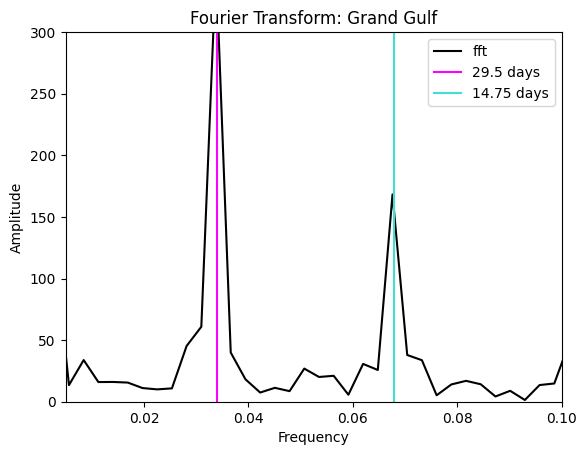

In [40]:


for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)
        
        # Assuming Julian Date column is named 'Julian Date'
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')

        # Plot the Fourier Transform
        plt.plot(xf, yf, color = 'black', label = "fft")
        plt.title(f'Fourier Transform: {location}')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.axvline(x= 0.033898, color = 'magenta', label = "29.5 days")
        plt.axvline(x= 0.067797, color= 'turquoise', label = "14.75 days")
        plt.legend()
        plt.show()


In [37]:
my_locs = ['Grand Gulf']
# my_locs=['Rolla']
for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)
        
        # Assuming Julian Date column is named 'Julian Date'
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')

        # Plot the Fourier Transform
        plt.plot(xf, yf, color = 'black', label = "fft")
        plt.title(f'Fourier Transform: {location}')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.axvline(x= 0.033898, color = 'magenta', label = "29.5 days")
        plt.axvline(x= 0.067797, color= 'turquoise', label = "14.75 days")
        plt.legend()
        plt.show()


c:\Users\djzak\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\djzak\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Invalid number of FFT data points (0) specified.

In [34]:
df

,True Date,Time,Julian Date,Night Date,SQM,Cloud Cover,Astro Dawn,Astro Dusk,Sun Up,Moon Rise,...,Moon Peak Altitude,Row Classification,Row Classification Confidence,Night Classification,Night Classification Confidence,No SQM Flag,Old SQM Flag,No Weather Flag,Old Weather Flag,Mult Weather Data Flag
0,6/1/2020,0:00:00,2459001.500,5/31/2020,NaN,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1,6/1/2020,0:05:00,2459001.503,5/31/2020,NaN,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
2,6/1/2020,0:10:00,2459001.507,5/31/2020,NaN,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
3,6/1/2020,0:15:00,2459001.510,5/31/2020,NaN,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
4,6/1/2020,0:20:00,2459001.514,5/31/2020,NaN,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161563,12/13/2021,23:35:00,2459562.482,12/13/2021,17.92,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
161564,12/13/2021,23:40:00,2459562.486,12/13/2021,17.93,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
161565,12/13/2021,23:45:00,2459562.489,12/13/2021,17.91,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
161566,12/13/2021,23:50:00,2459562.493,12/13/2021,17.93,NaN,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN


In [28]:
nightly_df = df[df['Time'] == "00:00:00"]
# nightly_df = nightly_df.dropna(subset=['SQM'])
nightly_df

,True Date,Time,Julian Date,Night Date,SQM,Cloud Cover,Astro Dawn,Astro Dusk,Sun Up,Moon Rise,...,Moon Peak Altitude,Row Classification,Row Classification Confidence,Night Classification,Night Classification Confidence,No SQM Flag,Old SQM Flag,No Weather Flag,Old Weather Flag,Mult Weather Data Flag


In [23]:
nightly_df = df[df['Time'] == "00:00:00"]
nightly_df = nightly_df.dropna(subset=['SQM'])
nightly_df

,True Date,Time,Julian Date,Night Date,SQM,Cloud Cover,Astro Dawn,Astro Dusk,Sun Up,Moon Rise,...,Moon Peak Altitude,Row Classification,Row Classification Confidence,Night Classification,Night Classification Confidence,No SQM Flag,Old SQM Flag,No Weather Flag,Old Weather Flag,Mult Weather Data Flag
288,2019-10-26,00:00:00,2458782.5,2019-10-25,16.17,8.0,NaN,NaN,False,NaN,...,NaN,Overcast,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,2019-10-27,00:00:00,2458783.5,2019-10-26,15.69,8.0,NaN,NaN,False,NaN,...,NaN,Overcast,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,2019-10-28,00:00:00,2458784.5,2019-10-27,15.02,4.0,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1152,2019-10-29,00:00:00,2458785.5,2019-10-28,14.59,8.0,NaN,NaN,False,NaN,...,NaN,Overcast,True,NaN,NaN,NaN,NaN,NaN,NaN,True
1440,2019-10-30,00:00:00,2458786.5,2019-10-29,15.29,8.0,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117504,2020-12-06,00:00:00,2459189.5,2020-12-05,18.79,0.0,NaN,NaN,False,NaN,...,NaN,Clear,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117792,2020-12-07,00:00:00,2459190.5,2020-12-06,15.67,8.0,NaN,NaN,False,NaN,...,NaN,Overcast,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118080,2020-12-08,00:00:00,2459191.5,2020-12-07,18.79,0.0,NaN,NaN,False,NaN,...,NaN,Clear,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118368,2020-12-09,00:00:00,2459192.5,2020-12-08,18.79,0.0,NaN,NaN,False,NaN,...,NaN,Clear,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


KeyError: 'Julian Date'

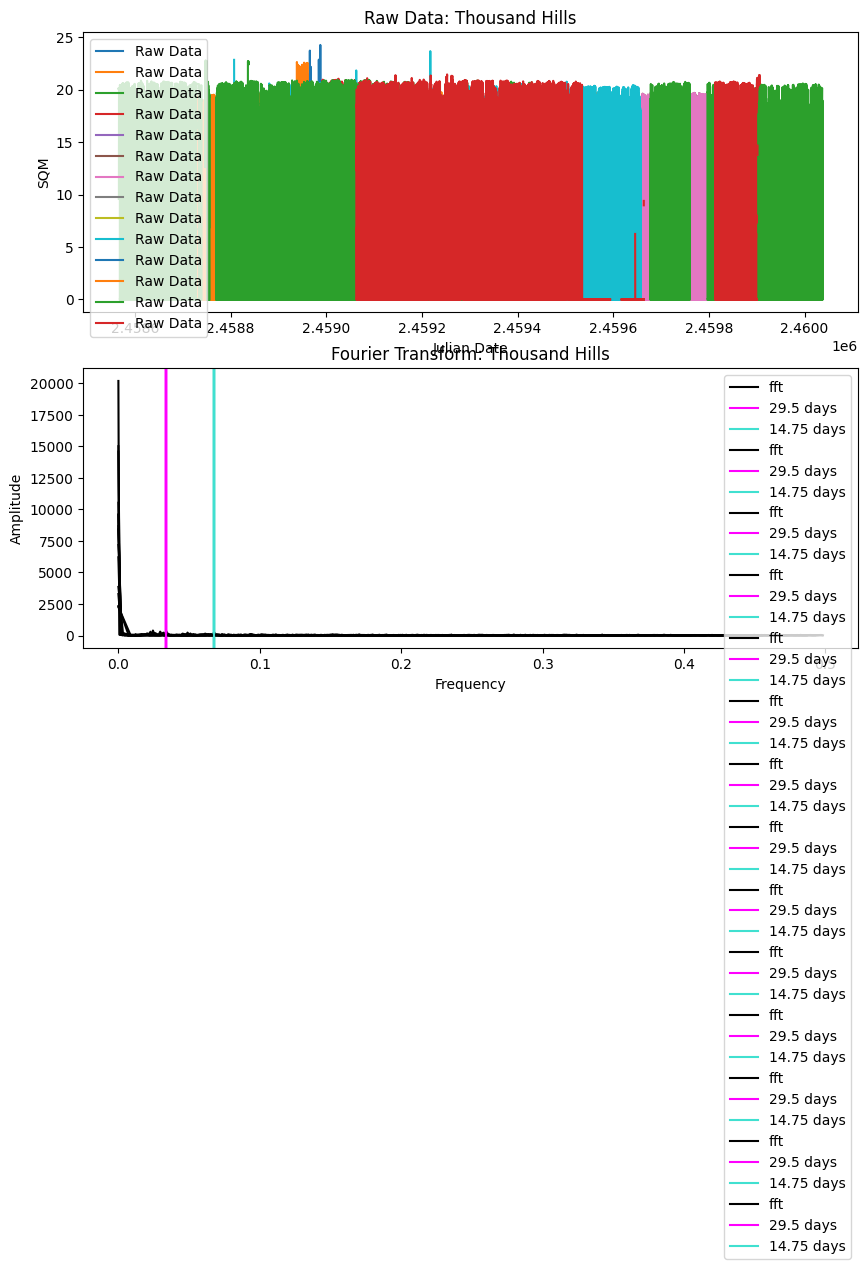

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)
        
        # Assuming Julian Date column is named 'Julian Date'
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')
        
        # Plot raw data
        ax = axs[0]
        df.plot(x='Julian Date', y='SQM', ax=ax, label='Raw Data')
        ax.set_title(f'Raw Data: {location}')
        ax.set_xlabel('Julian Date')
        ax.set_ylabel('SQM')
        
        # Plot Fourier Transform
        ax = axs[1]
        ax.plot(xf, yf, color='black', label="fft")
        ax.set_title(f'Fourier Transform: {location}')
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Amplitude')
        ax.axvline(x=0.033898, color='magenta', label="29.5 days")
        ax.axvline(x=0.067797, color='turquoise', label="14.75 days")
        ax.legend()

plt.tight_layout()
plt.show()


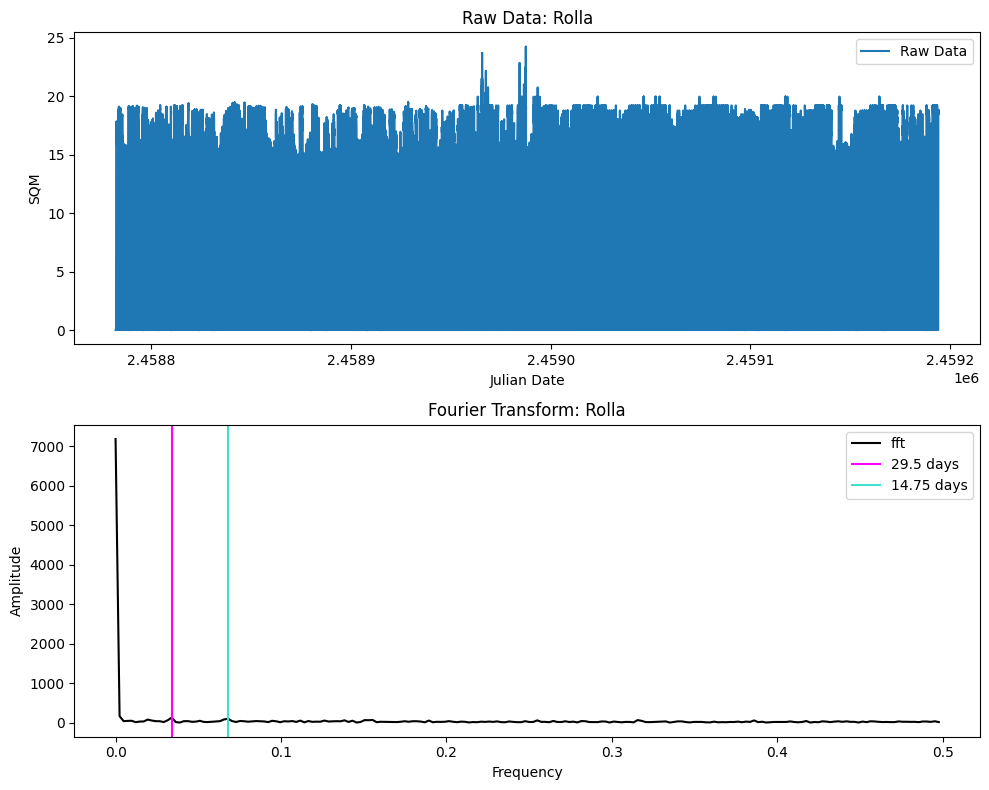

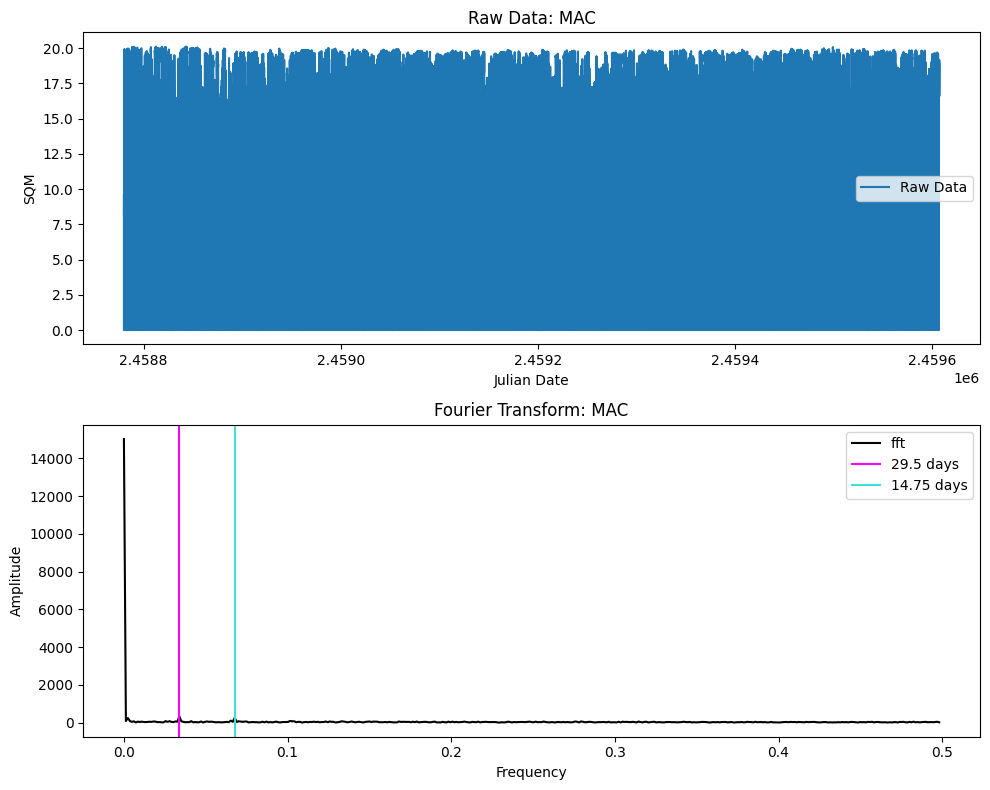

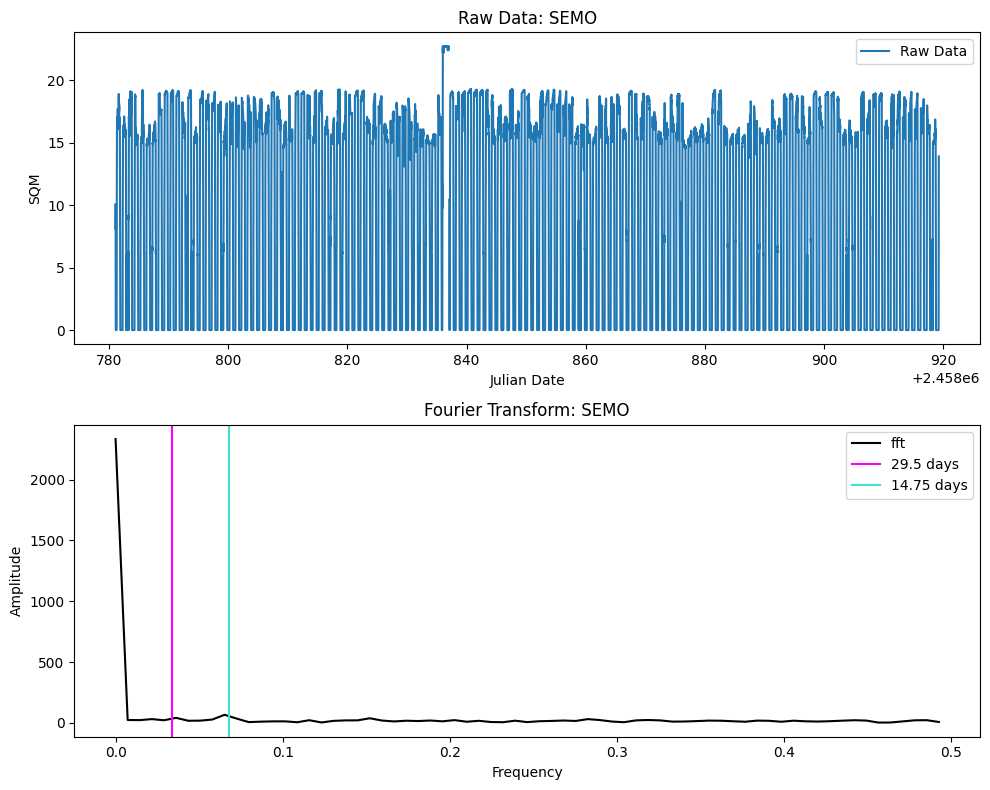

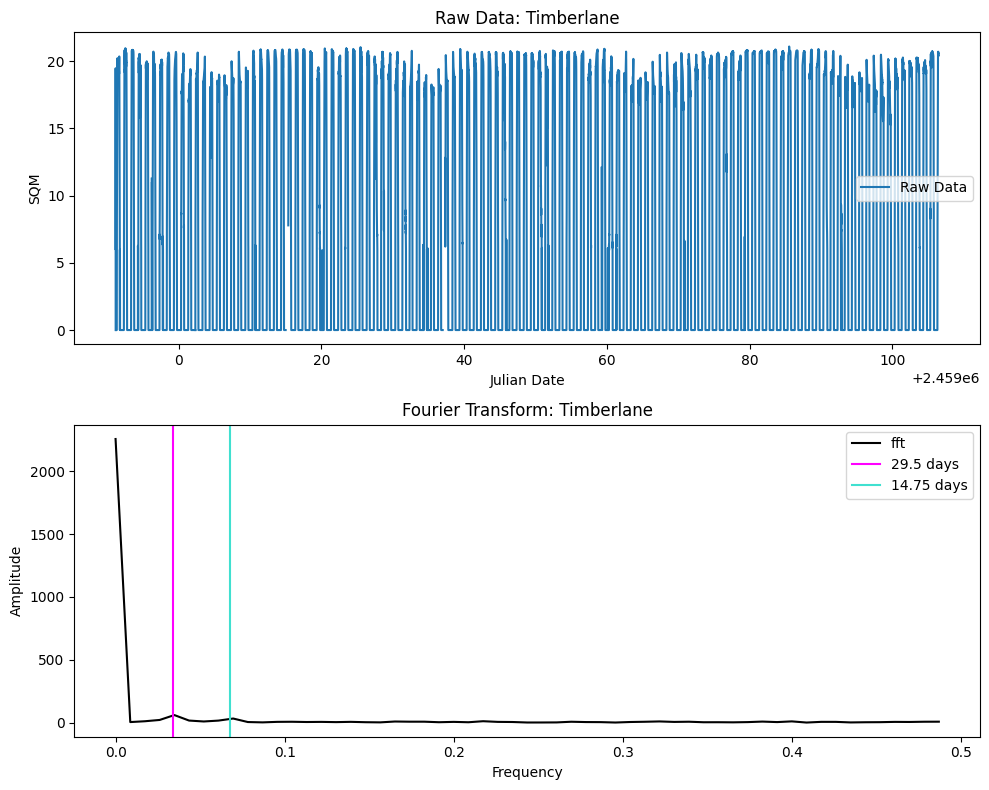

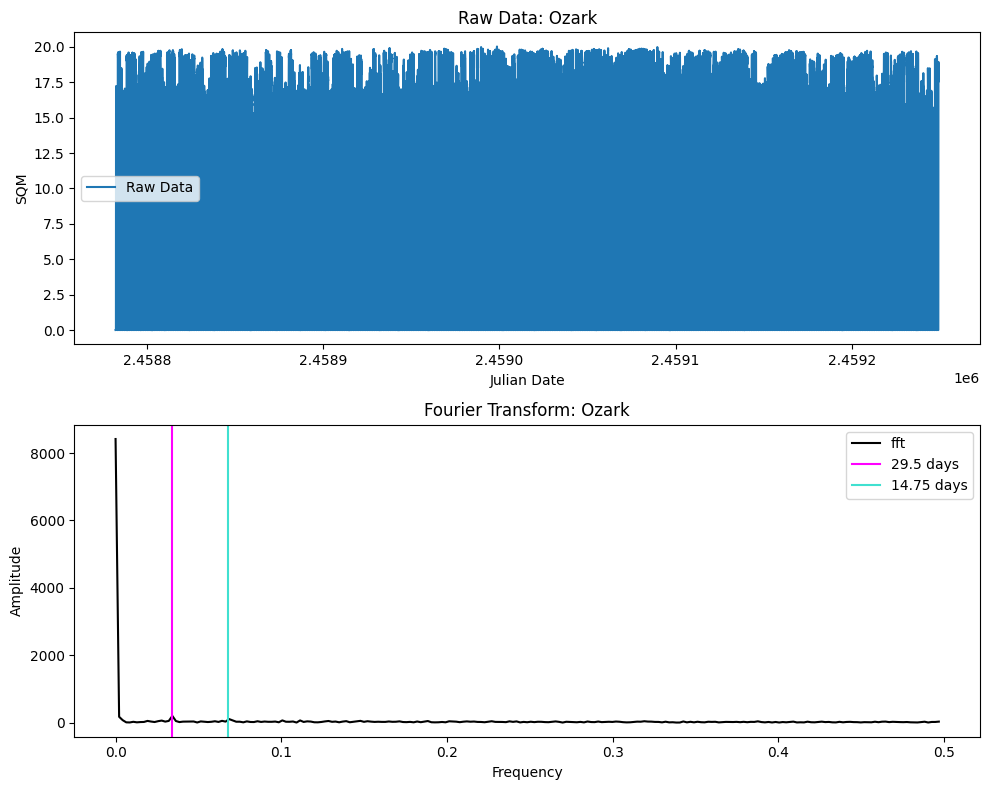

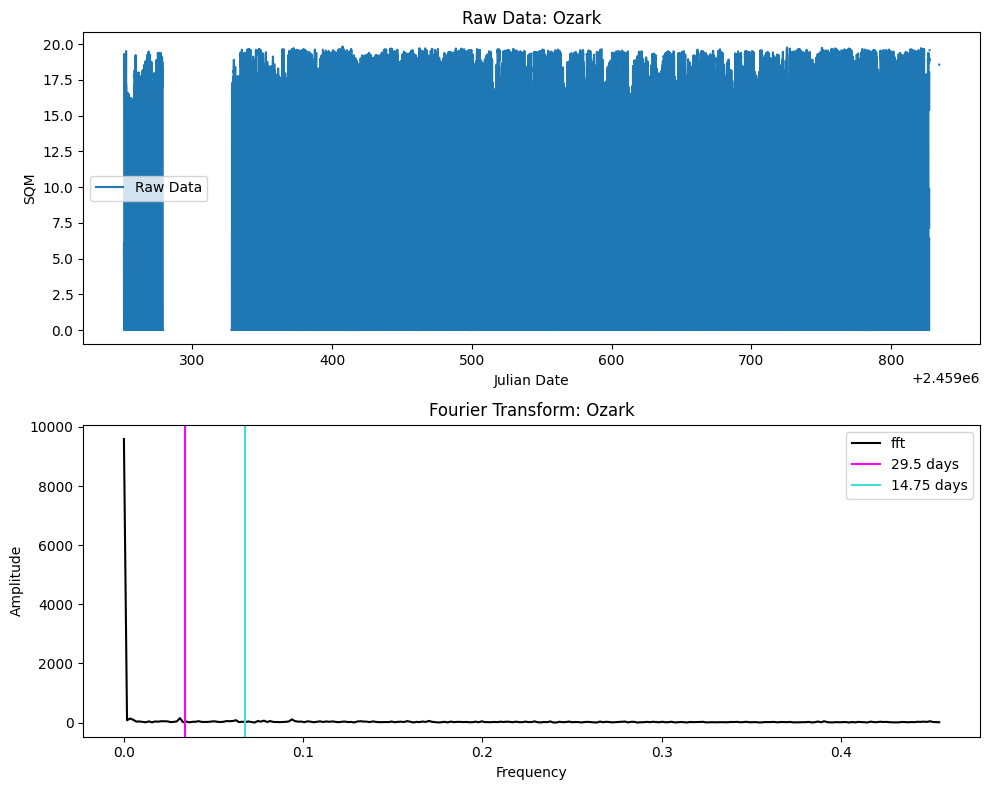

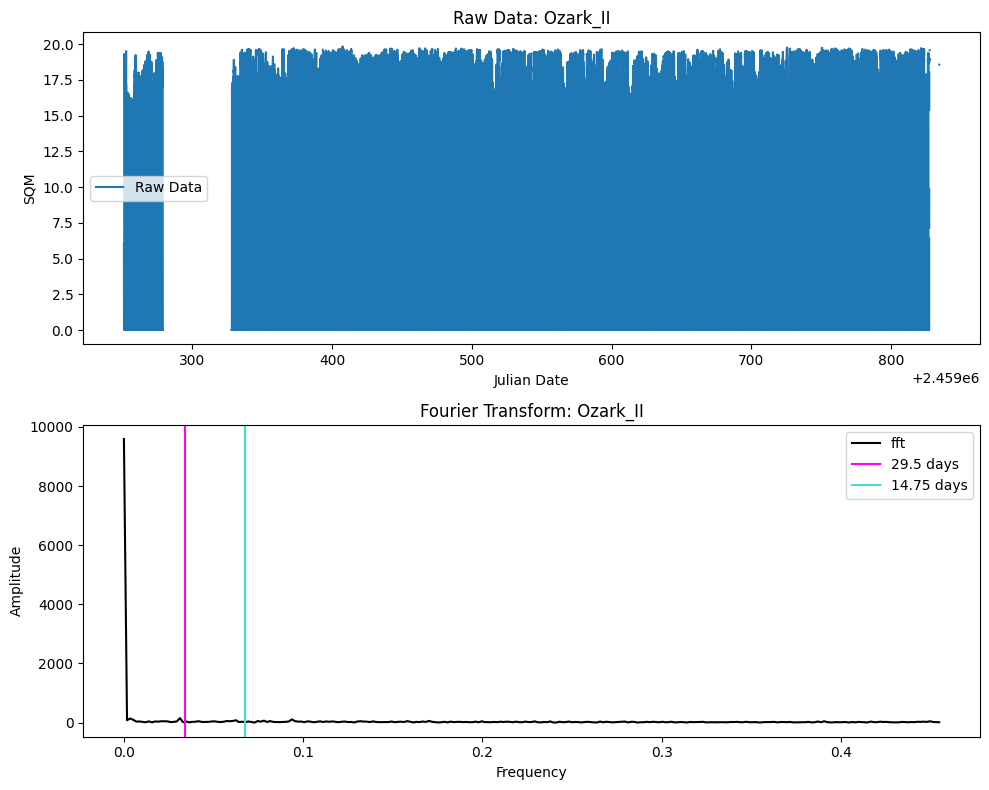

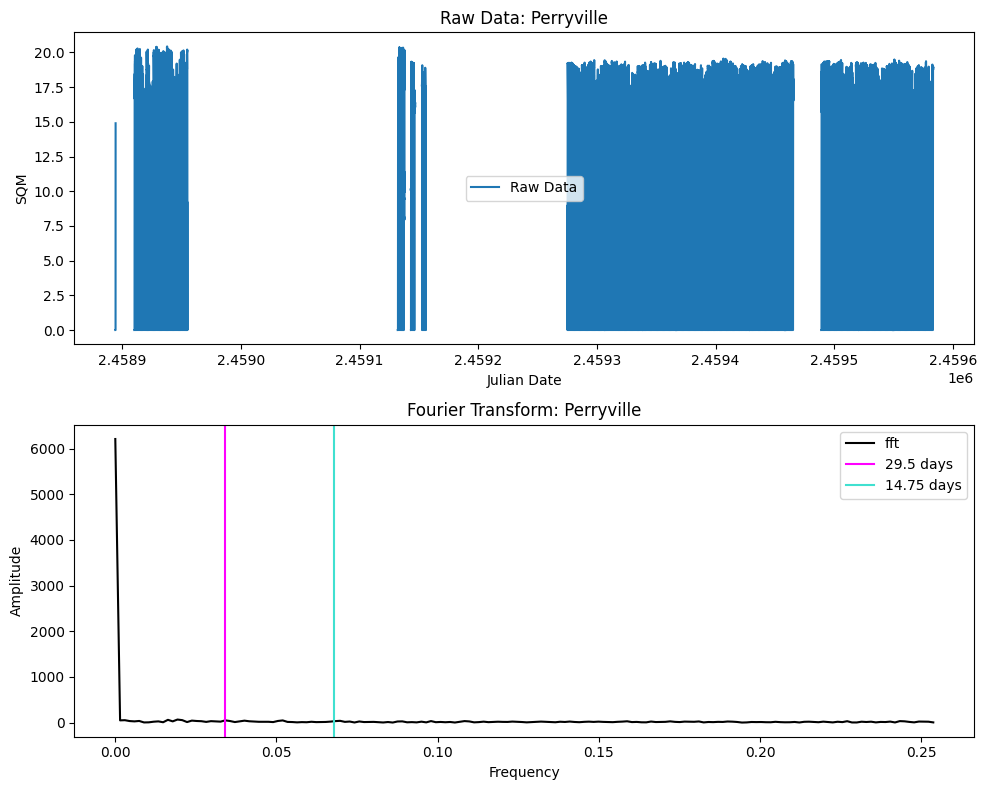

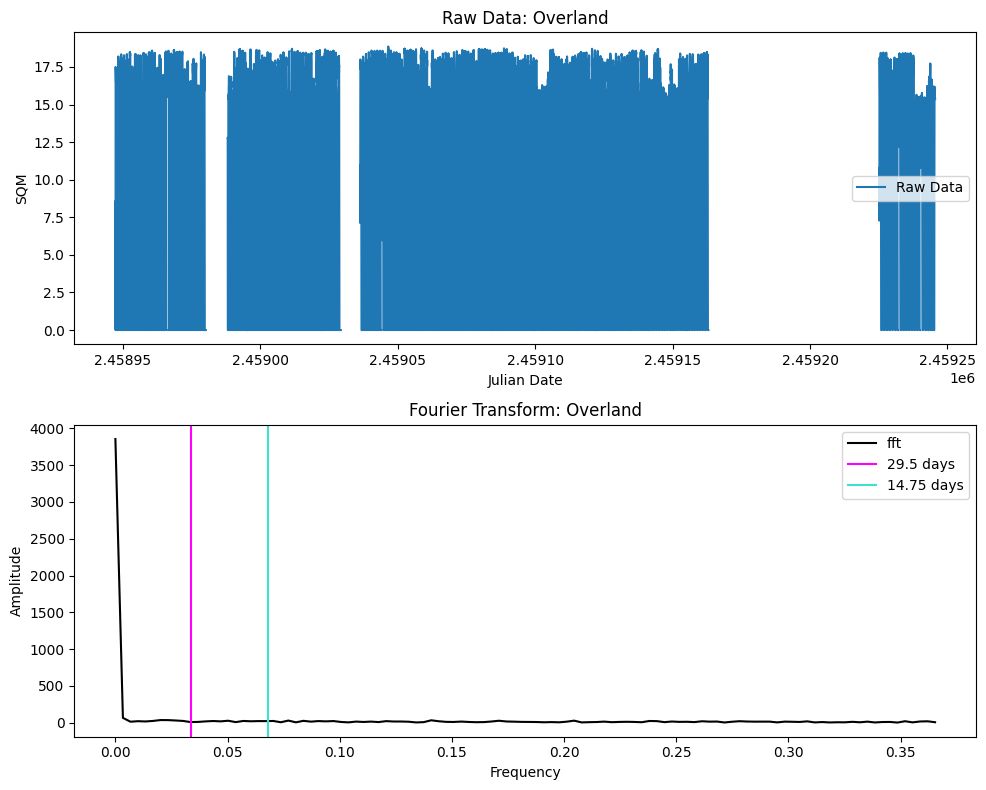

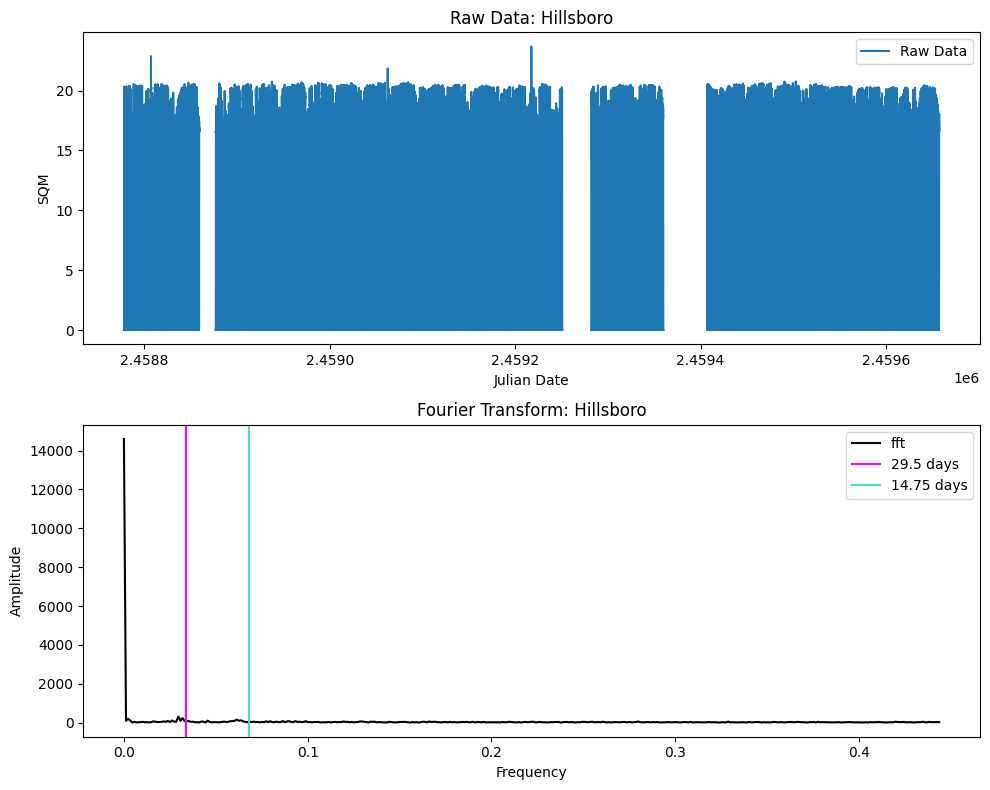

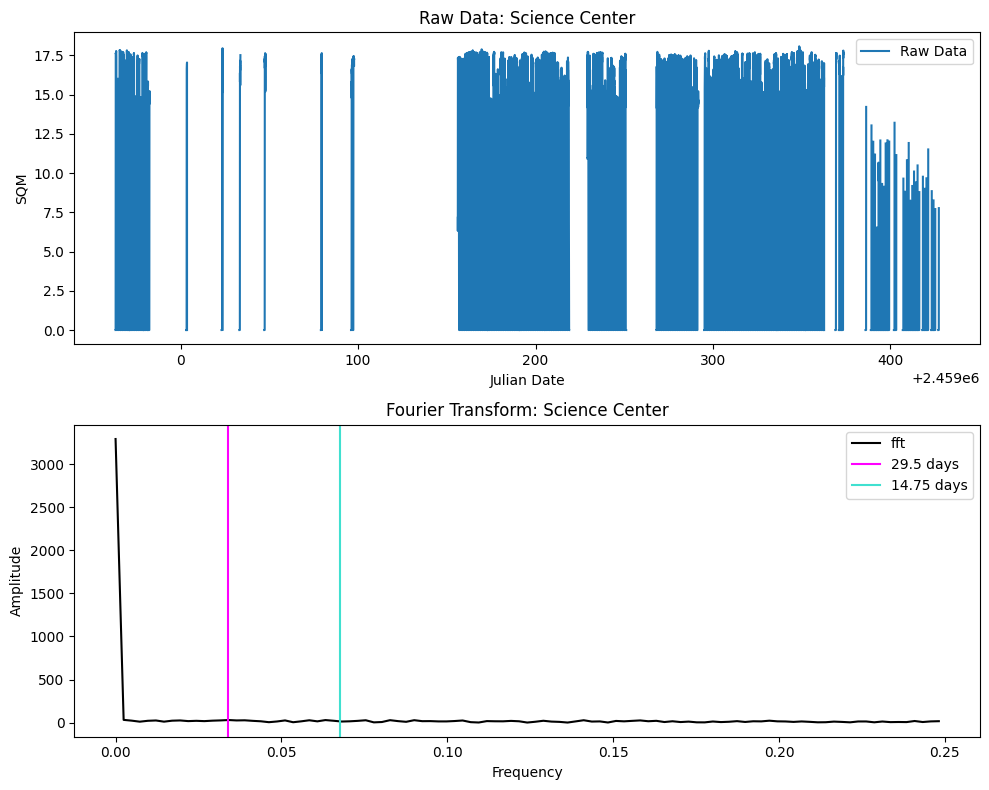

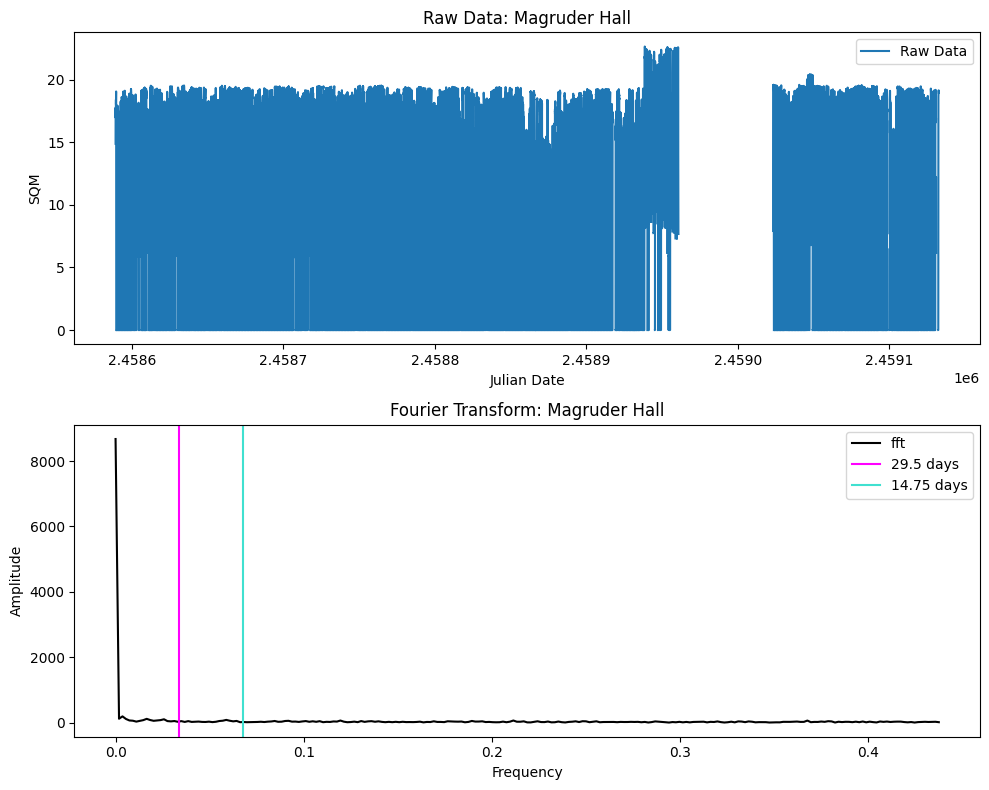

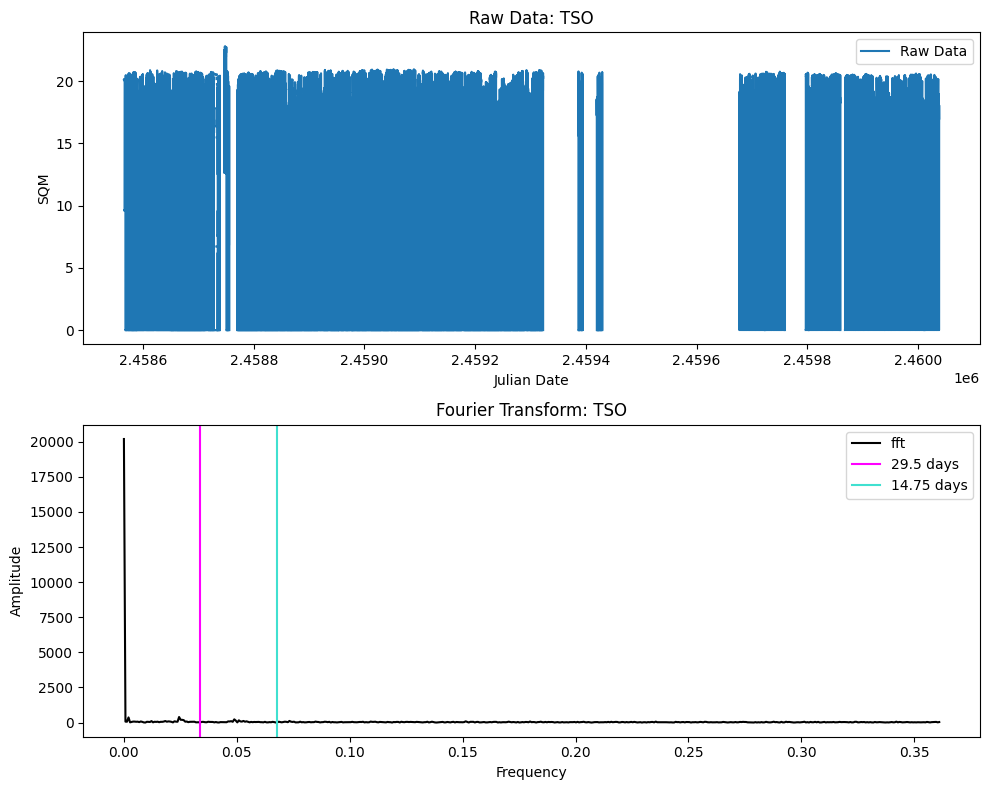

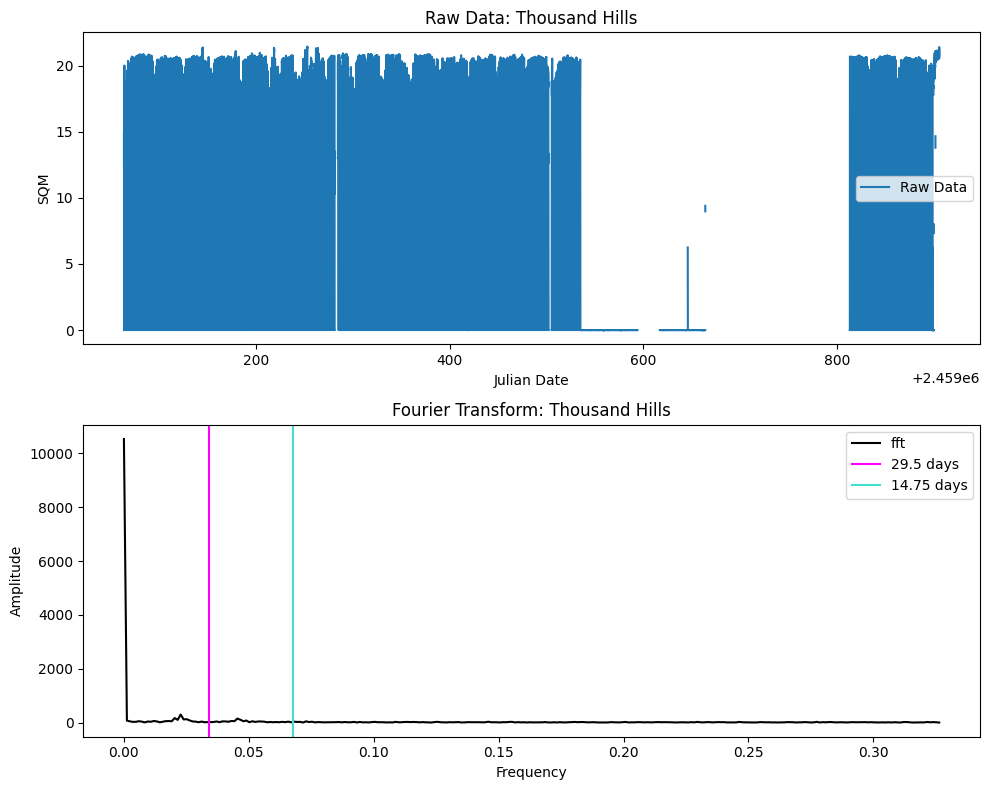

KeyError: 'Julian Date'

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)
        
        # Assuming Julian Date column is named 'Julian Date'
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')
        
        fig, axs = plt.subplots(2, 1, figsize=(10, 8))
        
        # Plot raw data
        df.plot(x='Julian Date', y='SQM', ax=axs[0], label='Raw Data')
        axs[0].set_title(f'Raw Data: {location}')
        axs[0].set_xlabel('Julian Date')
        axs[0].set_ylabel('SQM')
        
        # Plot Fourier Transform
        axs[1].plot(xf, yf, color='black', label="fft")
        axs[1].set_title(f'Fourier Transform: {location}')
        axs[1].set_xlabel('Frequency')
        axs[1].set_ylabel('Amplitude')
        axs[1].axvline(x=0.033898, color='magenta', label="29.5 days")
        axs[1].axvline(x=0.067797, color='turquoise', label="14.75 days")
        axs[1].legend()

        plt.tight_layout()
        plt.show()


NameError: name 'fourier_analysis' is not defined

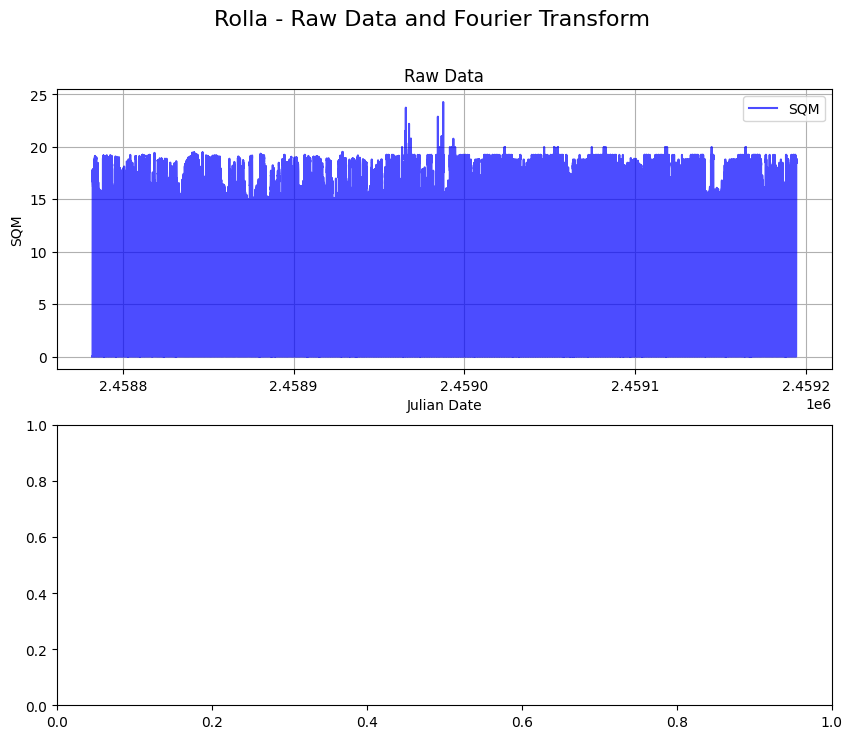

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

for location in my_locs:  
    
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    %matplotlib inline

    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)
        df = pd.read_csv(df_path, low_memory=False)

        fig, axs = plt.subplots(2, 1, figsize=(10, 8))
        fig.suptitle(f'{location} - Raw Data and Fourier Transform', fontsize=16)

        # Plot raw data
        axs[0].plot(df['Julian Date'], df['SQM'], color='blue', alpha=0.7, label='SQM')
        axs[0].set_title('Raw Data')
        axs[0].set_xlabel('Julian Date')
        axs[0].set_ylabel('SQM')
        axs[0].grid(True)
        axs[0].legend()

        # Fourier Transform
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')
        axs[1].plot(xf, yf, color='black', label="FFT")
        axs[1].set_title('Fourier Transform')
        axs[1].set_xlabel('Frequency')
        axs[1].set_ylabel('Amplitude')
        axs[1].axvline(x=0.033898, color='magenta', linestyle='--', label="29.5 days")
        axs[1].axvline(x=0.067797, color='turquoise', linestyle='--', label="14.75 days")
        axs[1].grid(True)
        axs[1].legend()

        plt.tight_layout()
        plt.show()


In [28]:

my_locs = ['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 'Perryville', 'Overland', 'Hillsboro', 
           'Science Center', 'Magruder Hall', 'MG Hall', 'TSO', 'Thousand_Hills', 'Grand Gulf', 'echo bluff', 
           'Jefferson Arch', 'Broemmelsiek Park']


my_locs = ['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 'Perryville', 'Overland', 'Hillsboro', 
           'Science Center',  'MG Hall', 'TSO', 'Thousand_Hills', 'Grand Gulf', 'echo bluff', 
           'Jefferson Arch', 'Broemmelsiek Park'] # NO Magruder Hall (still MG Hall, they're different lol)
my_locs=["TSO"]

C:\Users\djzak\AppData\Local\Temp\ipykernel_14956\938217984.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability and align right
C:\Users\djzak\AppData\Local\Temp\ipykernel_14956\938217984.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


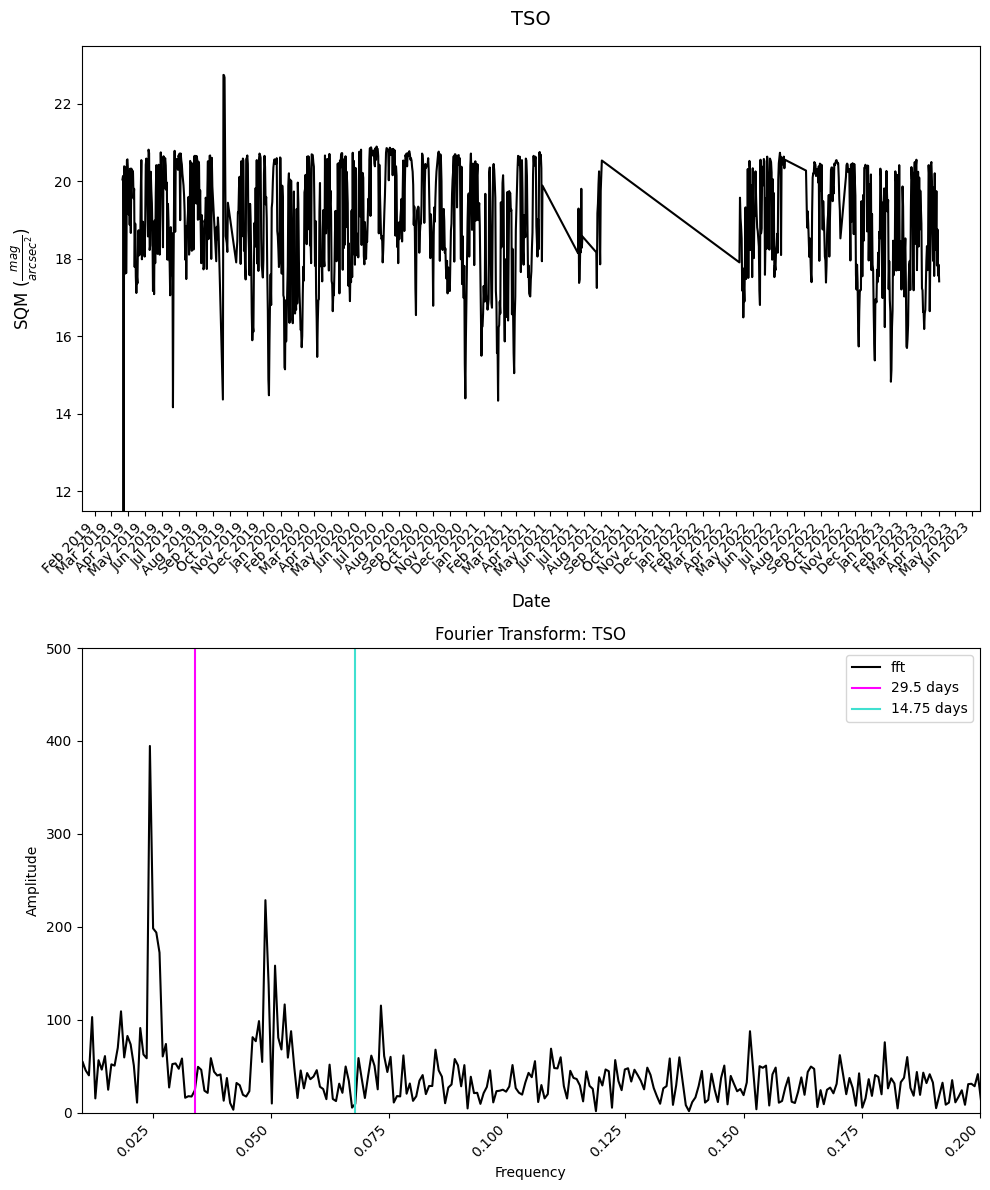

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

# my_locs = ["Broemmelsiek Park"]
def plot_avgs(ax, df, location):
    # Convert 'Night Date' column to datetime format
    df['Night Date'] = pd.to_datetime(df['Night Date'])
    
    # Loop through nights in the df
    nights_list = df['Night Date'].unique()
    
    # Filter for nightly data at midnight
    nightly_df = df[df['Time'] == "00:00:00"]
    nightly_df = nightly_df.dropna(subset=['SQM'])

    # len_night_df = len(df)
    # start =  len_night_df - 365
    # df = df.iloc[start:]
    # sqms = nightly_df['SQM'][0:365]
    # date = nightly_df["Night Date"][0:365]


    # Extract SQM values and dates
    # sqms = nightly_df['SQM'][0:365]
    # date = nightly_df["Night Date"][0:365]

    sqms = nightly_df['SQM']
    date = nightly_df["Night Date"]
    
    # Plotting
    ax.plot(date, sqms, color="black", label="SQM")  # SQM label fixed

    # Improved axes labels with larger font size and bumper space
    ax.set_xlabel("Date", fontsize=12, labelpad=10)
    ax.set_ylabel("SQM $(\\frac{mag}{arcsec^2})$", fontsize=12, labelpad=10)
    
    # Setting tick marks to label each month
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter("%b %Y"))

    ax.tick_params(axis='x', which='major', labelsize=10)
    ax.tick_params(axis='y', which='major', labelsize=10)  # Add this line to adjust y-axis label size
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability and align right
   # Rotate y-axis labels for better readability

    ax.set_ylim(11.5, 23.5)
    
    location = loc_dict[location][2]

    # Setting the title with larger font size and bumper space
    ax.set_title(location.replace("_"," "), fontsize=14, pad=15)


def plot_fourier(ax, xf, yf, location):
    ax.plot(xf, yf, color='black', label="fft")
    ax.set_title(f'Fourier Transform: {location}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Amplitude')
    ax.axvline(x=0.033898, color='magenta', label="29.5 days")
    ax.axvline(x=0.067797, color='turquoise', label="14.75 days")
    ax.set_xlim(0.01,0.2)
    ax.set_ylim(0,500)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend()

for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)
        # print(len(df))
        # print(df)



        # # # only do fourier fit for first year of data:
        # len_df = len(df)
        # start =  len_df - 105120
        # df = df.iloc[start:]

        # only do fourier fit for first year of data:
 
        # df = df.iloc[0:105120]


        # Assuming Julian Date column is named 'Julian Date'
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')
        
        fig, axs = plt.subplots(2, 1, figsize=(10, 12))
        
        # Plot raw data
        plot_avgs(axs[0], df, location)
        
        # Plot Fourier Transform
        plot_fourier(axs[1], xf, yf, location)
        
        plt.tight_layout()
        plt.show()


[21.25,
 'kirksville_regional_airport_mo_us',
 'Thousand_Hills',
 '40.191832',
 '-92.6492959',
 '37965',
 '23815',
 '13',
 'ground']